# Data Mining Group 08

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Read the file

In [2]:
data = pd.read_csv('heart_disease.csv')
submission = pd.read_csv('sample.csv')

In [3]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Count the number of null values in each column
null_counts = data.isnull().sum()

# Print the result
print(null_counts)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


In [5]:
# Removing columns with excessive missing values
columns_to_remove = ['ca', 'thal', 'slope']
data.drop(columns=columns_to_remove, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ KB


In [7]:
submission

,id,cluster
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0
...,...,...
294,910,0
295,911,0
296,912,0
297,916,0


In [8]:
submission['cluster'].value_counts()

cluster
0    299
Name: count, dtype: int64

In [9]:
data['exists'] = data['id'].isin(submission['id'])
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,exists
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,True
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,True
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,False
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,True
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,False
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,True
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,False
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,False


In [10]:
data['exists'].value_counts()

exists
False    621
True     299
Name: count, dtype: int64

In [11]:
#heart_data = data[data['exists'] == True]

submission_data = data[data['exists'] == True]

heart_data = data
heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,exists
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,True
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,True
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,False
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,True
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,False
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,True
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,False
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,False


In [12]:
heart_data.isna().sum()

id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
exists       0
dtype: int64

In [13]:
for col in heart_data:
    if heart_data[col].dtype == 'object':
        heart_data[col].fillna('Not known', inplace=True)
    if heart_data[col].dtype == 'int64':
        heart_data[col].fillna(heart_data[col].mode()[0],inplace=True)
    if heart_data[col].dtype == 'float64':
        heart_data[col].fillna(heart_data[col].mean(),inplace=True)
        
heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,exists
0,0,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,True
1,1,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,True
2,2,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,False
3,3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,True
4,4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,False
916,916,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,Not known,0.878788,True
917,917,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,False
918,918,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,Not known,0.878788,False


In [14]:
heart_data.drop(['id', 'exists'], axis=1, inplace=True)
heart_data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000
1,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000
2,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000
3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000
4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000
...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000
916,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,Not known,0.878788
917,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000
918,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,Not known,0.878788


In [15]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    object 
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    object 
 10  oldpeak   920 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 79.2+ KB


In [16]:
for col in heart_data:
    print(col, heart_data[col].dtype)

age int64
sex object
dataset object
cp object
trestbps float64
chol float64
fbs object
restecg object
thalch float64
exang object
oldpeak float64


In [17]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for col in heart_data:
    if heart_data[col].dtype == 'object':
        heart_data[col] = heart_data[col].astype(str)
        heart_data[col] = enc.fit_transform(heart_data[col].values.reshape(-1,1))
        
heart_data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,1.0,0.0,3.0,145.000000,233.0,2.0,1.0,150.000000,0.0,2.300000
1,67,1.0,0.0,0.0,160.000000,286.0,0.0,1.0,108.000000,2.0,1.500000
2,67,1.0,0.0,0.0,120.000000,229.0,0.0,1.0,129.000000,2.0,2.600000
3,37,1.0,0.0,2.0,130.000000,250.0,0.0,2.0,187.000000,0.0,3.500000
4,41,0.0,0.0,1.0,130.000000,204.0,0.0,1.0,172.000000,0.0,1.400000
...,...,...,...,...,...,...,...,...,...,...,...
915,54,0.0,3.0,0.0,127.000000,333.0,2.0,3.0,154.000000,0.0,0.000000
916,62,1.0,3.0,3.0,132.132404,139.0,0.0,3.0,137.545665,1.0,0.878788
917,55,1.0,3.0,0.0,122.000000,223.0,2.0,3.0,100.000000,0.0,0.000000
918,58,1.0,3.0,0.0,132.132404,385.0,2.0,1.0,137.545665,1.0,0.878788


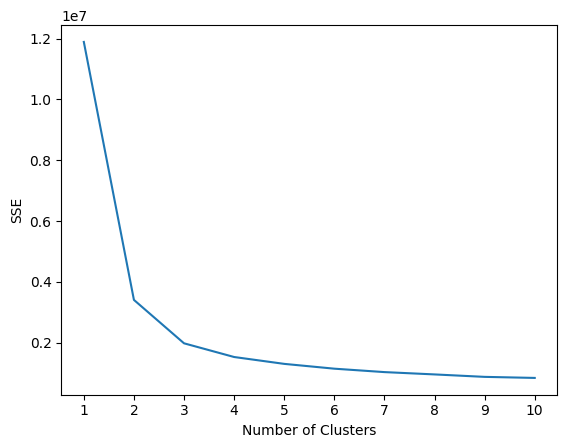

In [18]:
from sklearn.cluster import KMeans

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 42,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(heart_data)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=42)

#fit k-means algorithm to data
kmeans.fit(heart_data)

#view cluster assignments for each observation
predictions_kmeans = kmeans.labels_
predictions_kmeans

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [20]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(heart_data)
#view cluster assignments for each observation
predictions_agglo = agglo.labels_
predictions_agglo


array([2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,

In [21]:
heart_data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,1.0,0.0,3.0,145.000000,233.0,2.0,1.0,150.000000,0.0,2.300000
1,67,1.0,0.0,0.0,160.000000,286.0,0.0,1.0,108.000000,2.0,1.500000
2,67,1.0,0.0,0.0,120.000000,229.0,0.0,1.0,129.000000,2.0,2.600000
3,37,1.0,0.0,2.0,130.000000,250.0,0.0,2.0,187.000000,0.0,3.500000
4,41,0.0,0.0,1.0,130.000000,204.0,0.0,1.0,172.000000,0.0,1.400000
...,...,...,...,...,...,...,...,...,...,...,...
915,54,0.0,3.0,0.0,127.000000,333.0,2.0,3.0,154.000000,0.0,0.000000
916,62,1.0,3.0,3.0,132.132404,139.0,0.0,3.0,137.545665,1.0,0.878788
917,55,1.0,3.0,0.0,122.000000,223.0,2.0,3.0,100.000000,0.0,0.000000
918,58,1.0,3.0,0.0,132.132404,385.0,2.0,1.0,137.545665,1.0,0.878788


In [22]:
submission_array = submission_data['id']
submission_array

0        0
1        1
3        3
4        4
7        7
      ... 
910    910
911    911
912    912
916    916
919    919
Name: id, Length: 299, dtype: int64

In [23]:
# predictions = predictions_kmeans
predictions = predictions_agglo

In [24]:
count_elements = len(predictions)
count_elements

920

In [25]:
updated_filtered_predictions = [predictions[i-1] for i in submission_array if i-1 < len(predictions)]

count_elements = len(updated_filtered_predictions)
count_elements

299

(3, 11)


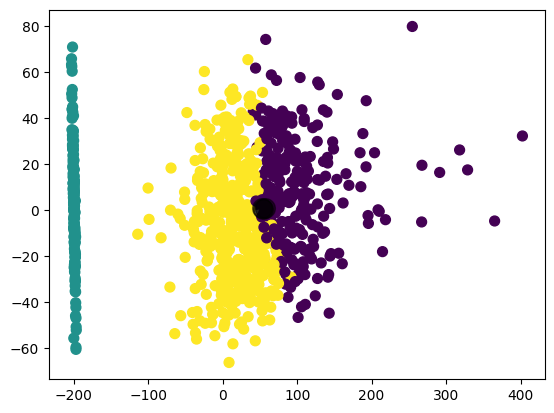

In [26]:
from sklearn.decomposition import PCA

pca = PCA(2)

pca_data = pca.fit_transform(heart_data)

x = pca_data[:,0]
y = pca_data[:,1]

plt.scatter(x, y, c=predictions, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

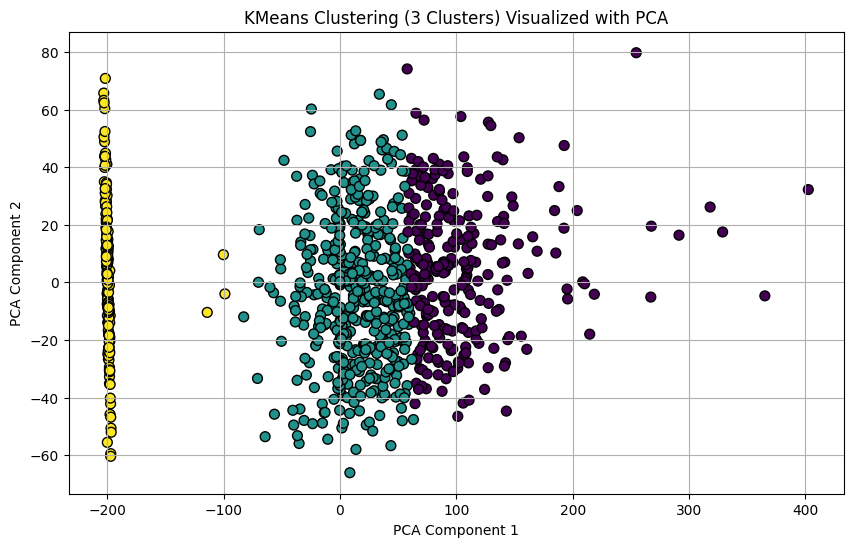

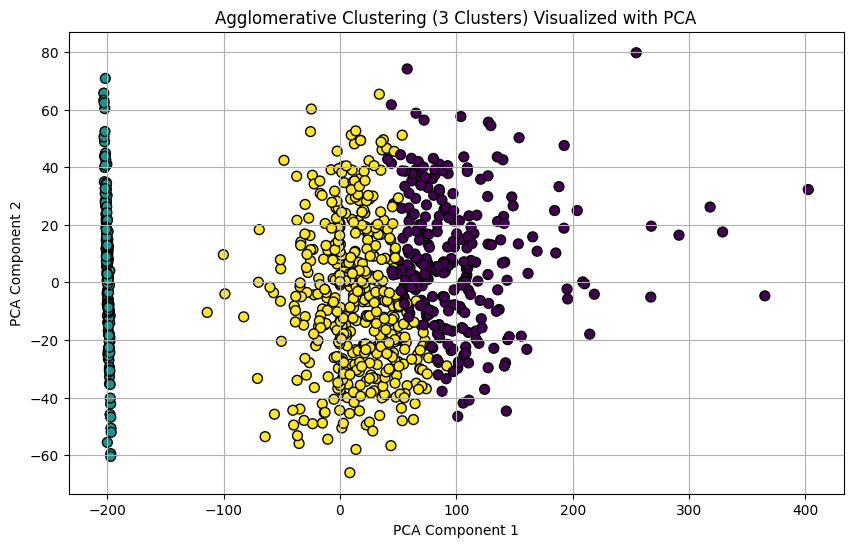

In [27]:
X_pca = pca.fit_transform(heart_data)

plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clustering (3 Clusters) Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions_agglo, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering (3 Clusters) Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [28]:

submission['cluster'] = updated_filtered_predictions
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,id,cluster
0,0,0
1,1,2
2,3,2
3,4,2
4,7,0
...,...,...
294,910,0
295,911,0
296,912,0
297,916,0
